In [7]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Flatten,Dense,Input,Dropout,BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_train_origin = pd.read_csv('../data/featured_data/X_train.csv')
y_train_origin = pd.read_csv('../data/featured_data/y_train.csv')

y_train_no_log = np.expm1(y_train_origin)

X_train_origin = X_train_origin.to_numpy()
y_train_no_log = y_train_no_log.to_numpy()
y_train_no_log = y_train_no_log.ravel()
X_train, X_val, y_train, y_val = train_test_split(X_train_origin, y_train_no_log, test_size=0.2, random_state=1) 
input_dim=X_train.shape[1]

In [3]:
model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='elu',kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='elu',kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='linear'))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_absolute_error')

In [8]:
epoch=300

# performance decay scheduling
# lr = lr*0.5 if val_loss does not decrease in 5 consequtive epochs
# can work with Adam
lr_scheduler_pfm = ReduceLROnPlateau(factor=0.5, patience=5)

# save the model when the performance on val is the best
checkpoint_callback = ModelCheckpoint('../models/best_NN.h5', save_best_only=True)

# stop train when there is no progress in 10 consequtive epochs
early_stop_callback = EarlyStopping(patience=10, restore_best_weights=True)

In [10]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32,
                    epochs=epoch, callbacks=[lr_scheduler_pfm, checkpoint_callback, early_stop_callback])

Train on 1168 samples, validate on 292 samples
Epoch 1/300
1168/1168 [==============================] - 1s 1ms/sample - loss: 182208.0685 - val_loss: 175770.6254
Epoch 2/300
1168/1168 [==============================] - 0s 111us/sample - loss: 182203.8480 - val_loss: 175765.3183
Epoch 3/300
1168/1168 [==============================] - 0s 109us/sample - loss: 182195.9454 - val_loss: 175754.9944
Epoch 4/300
1168/1168 [==============================] - 0s 105us/sample - loss: 182180.5060 - val_loss: 175735.4037
Epoch 5/300
1168/1168 [==============================] - 0s 111us/sample - loss: 182151.9694 - val_loss: 175700.8467
Epoch 6/300
1168/1168 [==============================] - 0s 103us/sample - loss: 182103.0424 - val_loss: 175643.4632
Epoch 7/300
1168/1168 [==============================] - 0s 109us/sample - loss: 182025.9369 - val_loss: 175556.4882
Epoch 8/300
1168/1168 [==============================] - 0s 119us/sample - loss: 181912.0670 - val_loss: 175432.7838
Epoch 9/300
1168/11

1168/1168 [==============================] - 0s 143us/sample - loss: 32198.4423 - val_loss: 35692.2859
Epoch 71/300
1168/1168 [==============================] - 0s 126us/sample - loss: 31572.5427 - val_loss: 35041.8146
Epoch 72/300
1168/1168 [==============================] - 0s 126us/sample - loss: 30988.1066 - val_loss: 34420.1942
Epoch 73/300
1168/1168 [==============================] - 0s 161us/sample - loss: 30453.9391 - val_loss: 33873.4838
Epoch 74/300
1168/1168 [==============================] - 0s 118us/sample - loss: 29959.6313 - val_loss: 33380.4099
Epoch 75/300
1168/1168 [==============================] - 0s 121us/sample - loss: 29488.9785 - val_loss: 32888.6268
Epoch 76/300
1168/1168 [==============================] - 0s 119us/sample - loss: 29044.3983 - val_loss: 32442.9533
Epoch 77/300
1168/1168 [==============================] - 0s 114us/sample - loss: 28624.2076 - val_loss: 32018.8920
Epoch 78/300
1168/1168 [==============================] - 0s 110us/sample - loss: 282

1168/1168 [==============================] - 0s 118us/sample - loss: 19850.5398 - val_loss: 24274.4060
Epoch 141/300
1168/1168 [==============================] - 0s 118us/sample - loss: 19793.7333 - val_loss: 24202.6819
Epoch 142/300
1168/1168 [==============================] - 0s 118us/sample - loss: 19725.9098 - val_loss: 24170.0924
Epoch 143/300
1168/1168 [==============================] - 0s 116us/sample - loss: 19669.5028 - val_loss: 24117.1799
Epoch 144/300
1168/1168 [==============================] - 0s 115us/sample - loss: 19619.8104 - val_loss: 24068.7299
Epoch 145/300
1168/1168 [==============================] - 0s 111us/sample - loss: 19553.2520 - val_loss: 24037.2542
Epoch 146/300
1168/1168 [==============================] - 0s 116us/sample - loss: 19500.2613 - val_loss: 23990.7579
Epoch 147/300
1168/1168 [==============================] - 0s 117us/sample - loss: 19444.5329 - val_loss: 23937.8825
Epoch 148/300
1168/1168 [==============================] - 0s 120us/sample - l

1168/1168 [==============================] - 0s 120us/sample - loss: 16973.1864 - val_loss: 21942.2799
Epoch 211/300
1168/1168 [==============================] - 0s 118us/sample - loss: 16951.8579 - val_loss: 21914.0047
Epoch 212/300
1168/1168 [==============================] - 0s 119us/sample - loss: 16930.3551 - val_loss: 21896.6235
Epoch 213/300
1168/1168 [==============================] - 0s 118us/sample - loss: 16884.7882 - val_loss: 21874.0920
Epoch 214/300
1168/1168 [==============================] - 0s 117us/sample - loss: 16856.5467 - val_loss: 21855.2965
Epoch 215/300
1168/1168 [==============================] - 0s 119us/sample - loss: 16832.2293 - val_loss: 21824.3917
Epoch 216/300
1168/1168 [==============================] - 0s 115us/sample - loss: 16809.3106 - val_loss: 21813.4642
Epoch 217/300
1168/1168 [==============================] - 0s 117us/sample - loss: 16775.5222 - val_loss: 21787.5889
Epoch 218/300
1168/1168 [==============================] - 0s 117us/sample - l

1168/1168 [==============================] - 0s 120us/sample - loss: 15272.4469 - val_loss: 20575.6195
Epoch 281/300
1168/1168 [==============================] - 0s 115us/sample - loss: 15251.7795 - val_loss: 20550.2591
Epoch 282/300
1168/1168 [==============================] - 0s 117us/sample - loss: 15237.8746 - val_loss: 20544.3879
Epoch 283/300
1168/1168 [==============================] - 0s 113us/sample - loss: 15214.7854 - val_loss: 20541.2527
Epoch 284/300
1168/1168 [==============================] - 0s 117us/sample - loss: 15190.6476 - val_loss: 20533.3993
Epoch 285/300
1168/1168 [==============================] - 0s 116us/sample - loss: 15188.9263 - val_loss: 20522.3724
Epoch 286/300
1168/1168 [==============================] - 0s 115us/sample - loss: 15159.8421 - val_loss: 20509.8321
Epoch 287/300
1168/1168 [==============================] - 0s 113us/sample - loss: 15132.3704 - val_loss: 20504.2248
Epoch 288/300
1168/1168 [==============================] - 0s 102us/sample - l

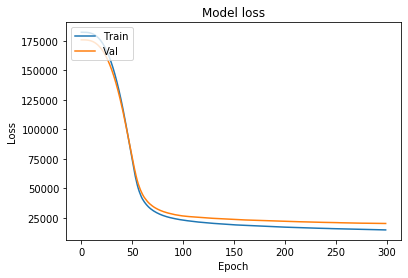

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [ ]:
##  NN is not suitable for regression task, hard for hyperparameter tuning and explanation
##  MAE > 20000